In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [23]:
my_data=pd.read_csv("Admission_predict.csv")
my_data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [24]:
my_data.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000          0.34000  
25%      3.00000    8.127500    0.000000          0.63000  
50%      3.50000    8.560000    1.000000          0.72000  
75%      4.00000    9.040000    1.000000          0.82000  
max      5.00000    9.920000    1.000000          0.97000

<Axes: >

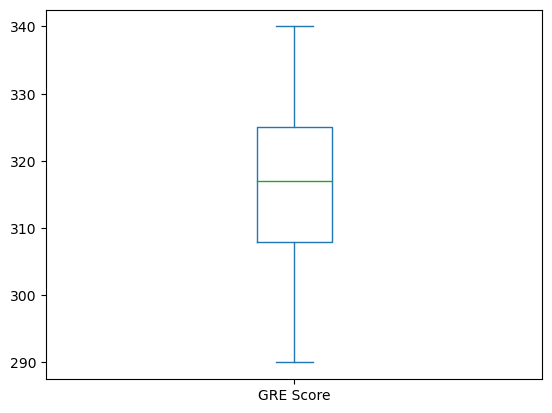

In [25]:
my_data["GRE Score"].plot.box()

In [26]:
import matplotlib.pyplot as plt

In [27]:
my_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [28]:
def box_plot(col):
    plt.figure()
    my_data[col].plot(kind="box")
    plt.title(f"box plot of {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

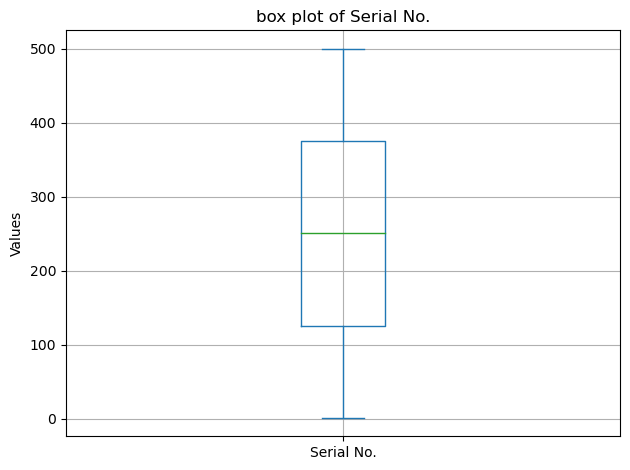

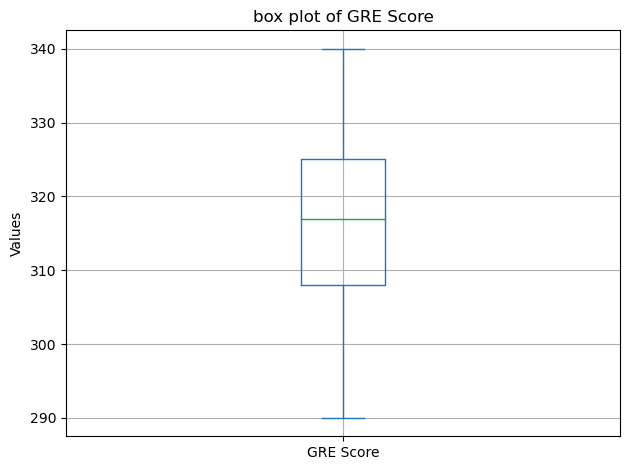

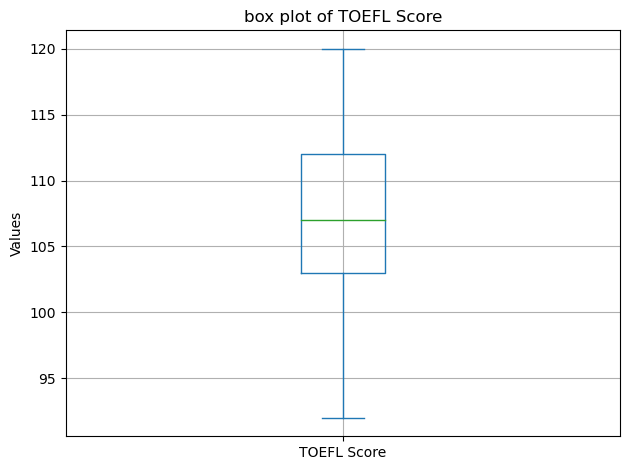

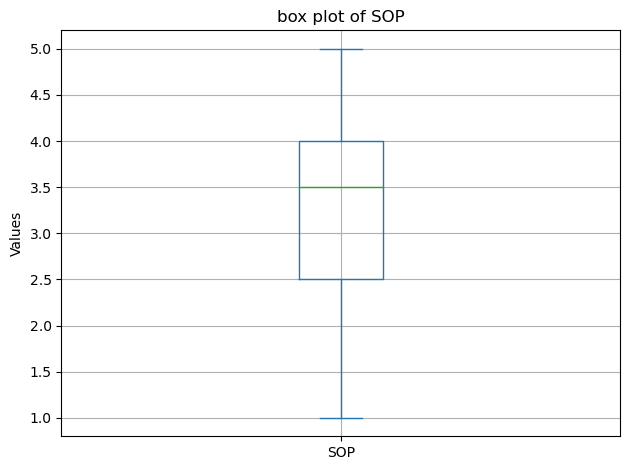

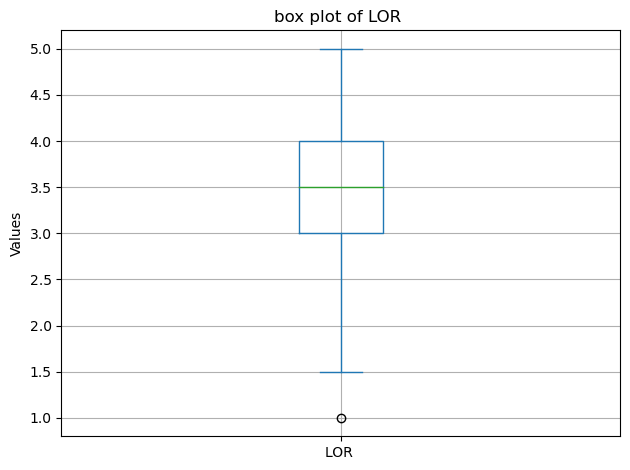

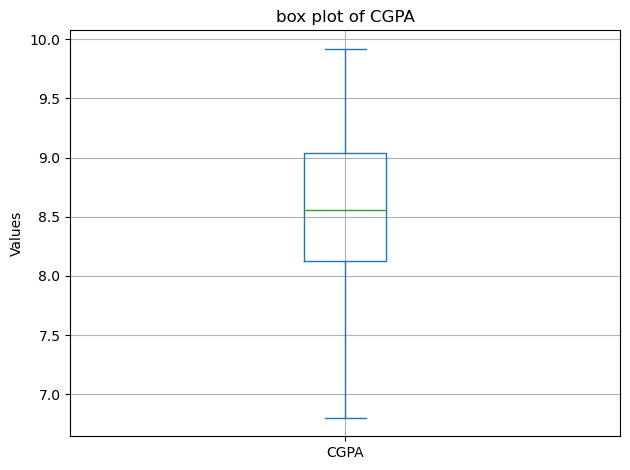

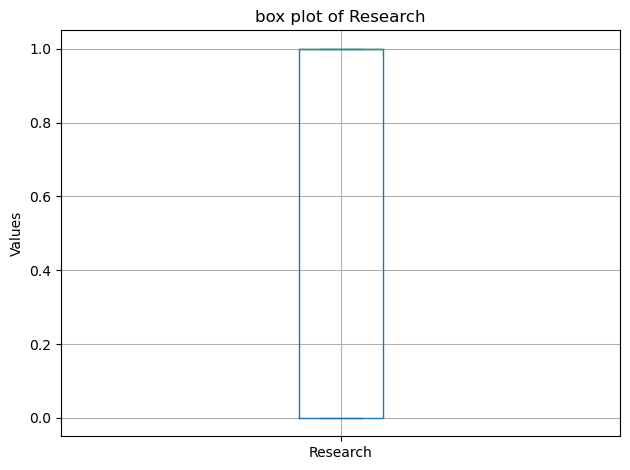

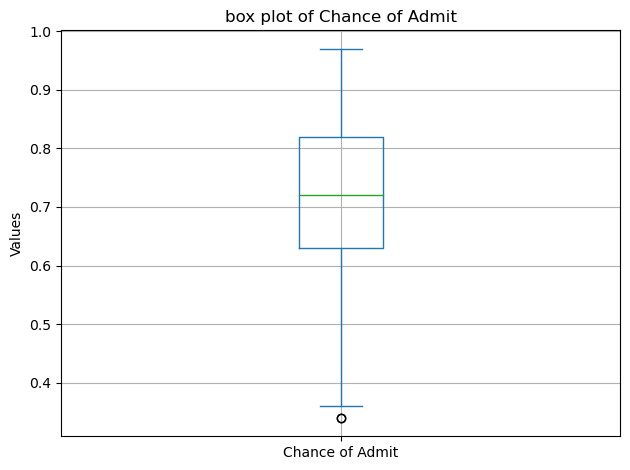

In [29]:
for col in my_data.columns:
    box_plot(col)


<Axes: xlabel='University Rating'>

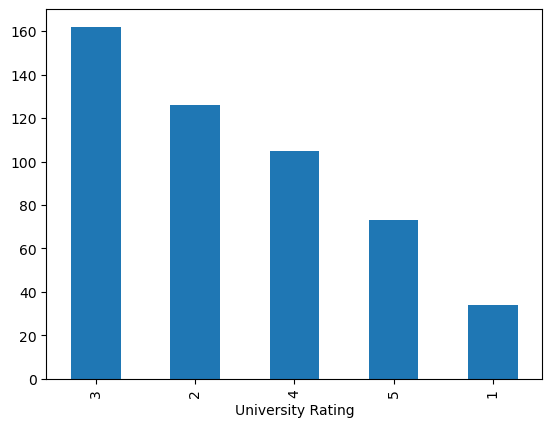

In [30]:
my_data["University Rating"].value_counts().plot(kind="bar")


In [31]:
def bar_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="bar",rot=90)
    plt.title(f"Bar plot of {col}")
    plt.xticks(fontsize=10)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

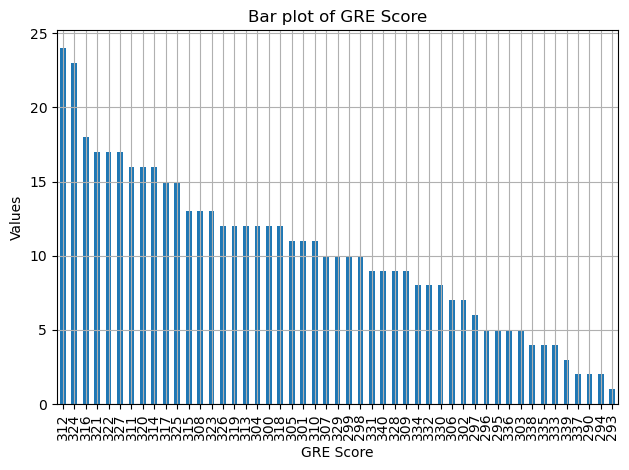

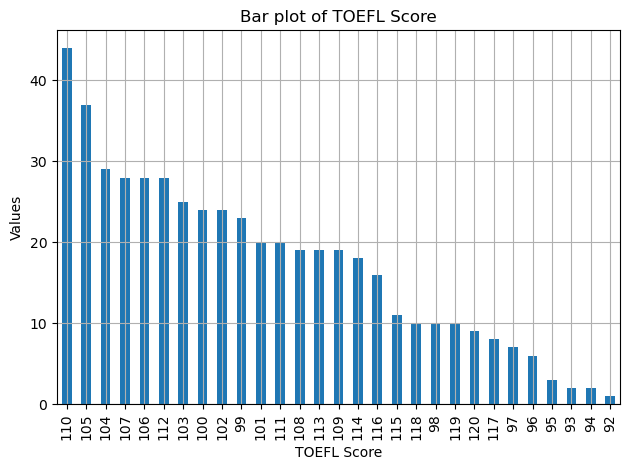

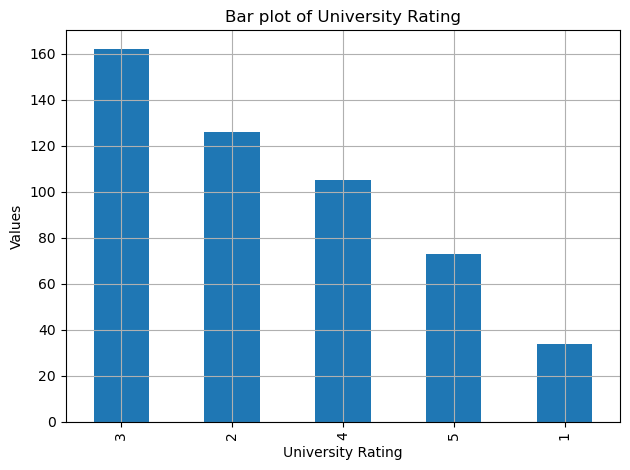

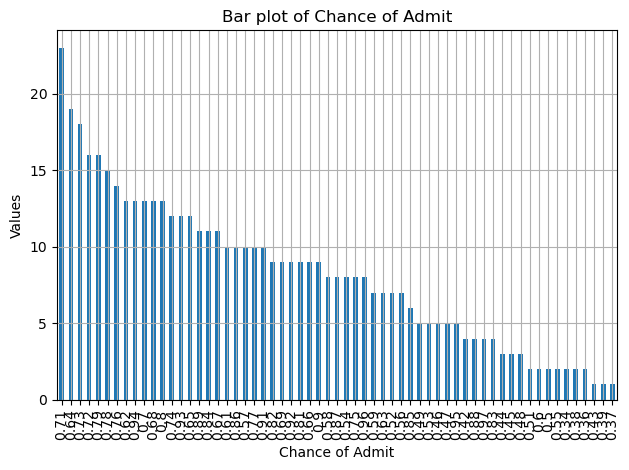

In [32]:
for col in ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','Research','Chance of Admit']:
    bar_plot(col)

In [33]:
def line_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="line")
    plt.title(f"line plot of {col}")
    plt.xticks(fontsize=10)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

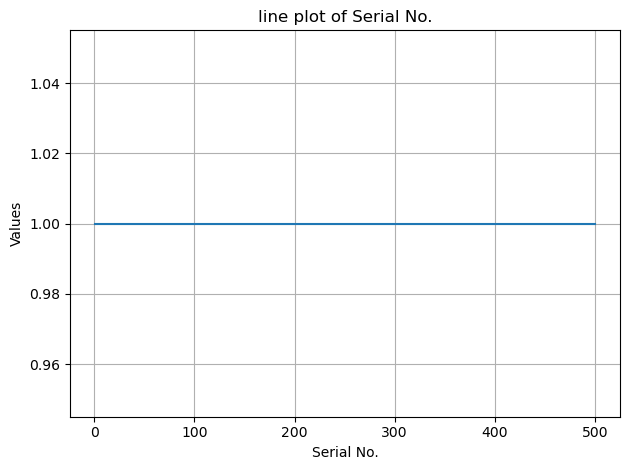

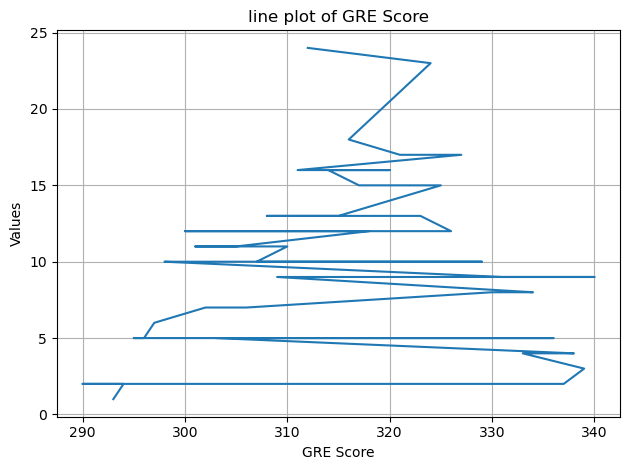

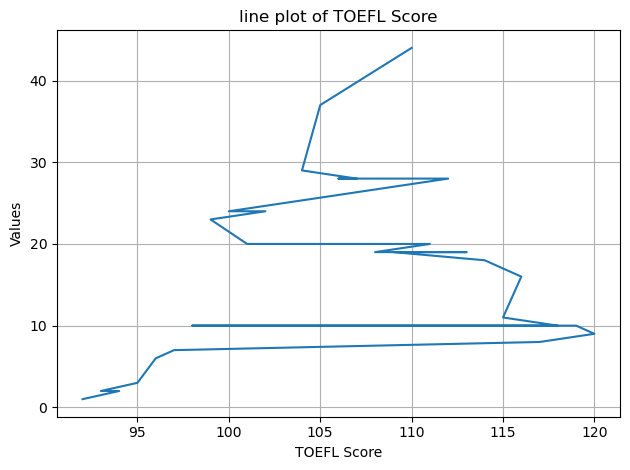

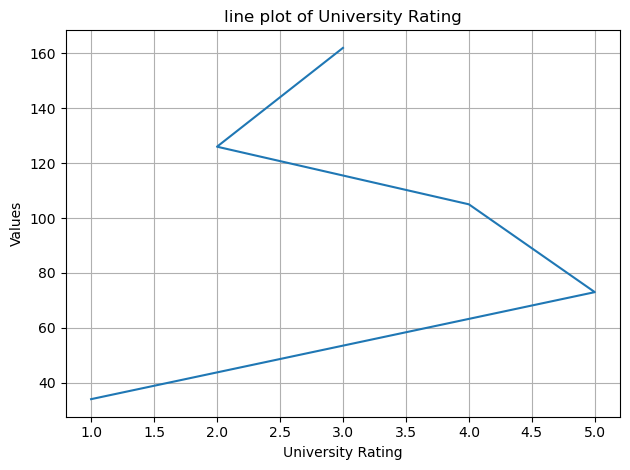

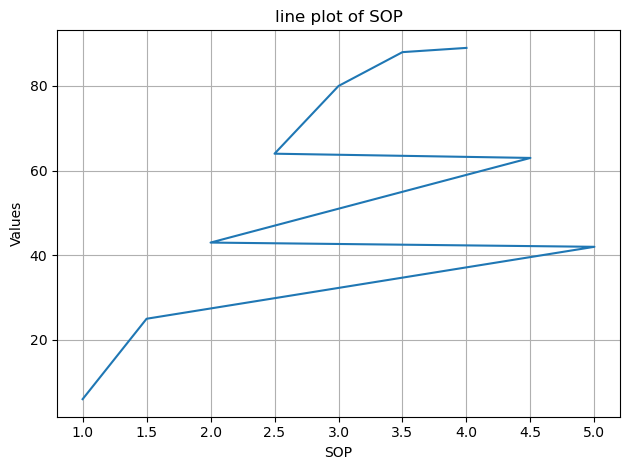

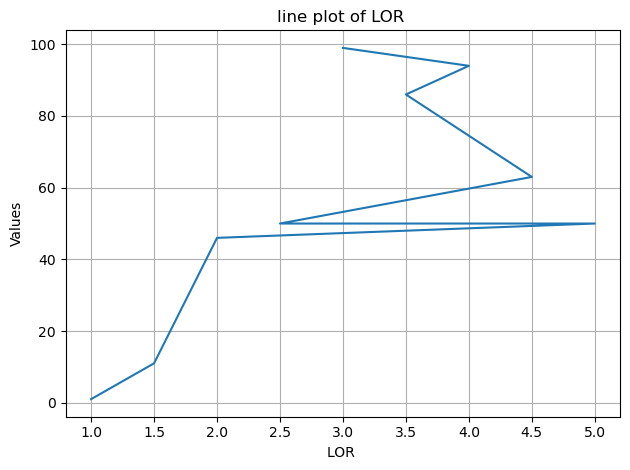

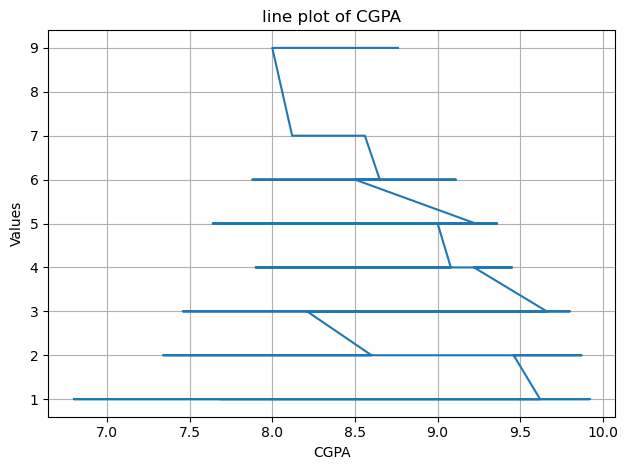

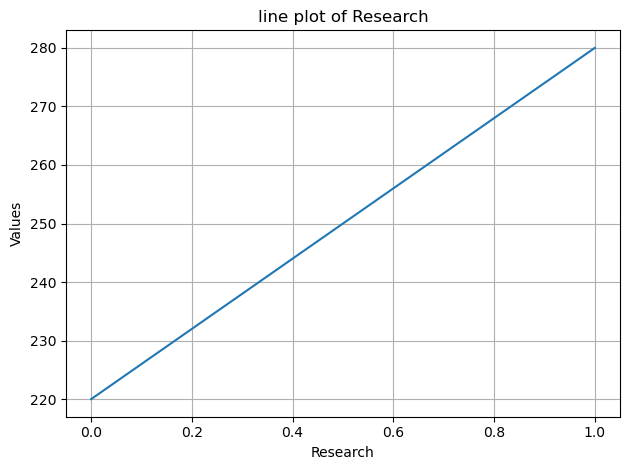

In [34]:
for col in my_data.columns:
    line_plot(col)

In [35]:
y=my_data["Chance of Admit"]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [36]:
x=my_data.drop(["Chance of Admit","Serial No."],axis=1)
x

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"x_test {y_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")


x_train (350, 7)
x_test (150,)
y_train (350,)
y_test (150,)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model_logr=LinearRegression()
model_logr

LinearRegression()

In [40]:
model_logr.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred=model_logr.predict(x_test)
y_pred

array([0.65280328, 0.70945113, 0.93670057, 0.73146137, 0.81803279,
       0.66920636, 0.74796312, 0.71437662, 0.79220523, 0.66014296,
       0.66818041, 0.57365165, 0.79048746, 0.79275362, 0.77460648,
       0.85998859, 0.62886953, 0.75414155, 0.90227196, 0.67503422,
       0.62439904, 0.79448136, 0.83891151, 0.61190399, 0.78749169,
       0.57607235, 0.94963666, 0.64733575, 0.8623322 , 0.71522672,
       0.63363523, 0.81333335, 0.59677901, 0.90897556, 0.51109914,
       0.81966876, 0.67915838, 0.63348767, 0.65567508, 0.91162667,
       0.57351247, 0.66678197, 0.77751227, 0.96973634, 0.77804167,
       0.52364615, 0.65776846, 0.62852765, 0.66699699, 0.65395225,
       0.83381271, 0.91740807, 0.8826517 , 0.63003308, 0.75486868,
       0.65064233, 0.75191415, 0.60692357, 0.66696528, 0.70579381,
       0.44508726, 0.71440199, 0.74788172, 0.85051786, 0.97645415,
       0.61189214, 0.73736489, 0.78395854, 0.93164097, 0.70314242,
       0.60482269, 0.65415503, 0.82887293, 0.50120221, 0.92751

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [44]:
mse=mean_squared_error(y_test,y_pred)

In [45]:
rmse=sqrt(mse)

In [46]:
rmse

0.06423343550447691